## Introducing Jupyter, LaTeX, Markdown, Python, Numpy, and Linear Algebra

We will be using Google Colab and Jupyter Notebooks extensively within this course.

Colab extends Jupyter Notebooks.  It derives from the same codebase.



## Notation


Example              | Meaning
---------------------|----------------------------------------------
$a$                  |  scalar (integer or real number)
$\mathbf{a}$         |  vector
$A$                  |  matrix
$A$                  |  tensor
$\mathbf{e}^{(i)}$   |  standard basis vector (i.e., one-hot vector)
$A^T$                |  tranpose of matrix $\mathbf{A}$
$A_{i,j}$            |  element at $i^{th}$ row and $j^{th}$ column



## Vectors, numpy arrays, and lists in Python.

A vector can be represented as either a list or a numpy array, but the differences are 
significant both in terms of run time and memory usage.

In [6]:
# Vectors vs. lists in Python

# A list is represented within Python as a dynamic array.
# Here a list is used to represent a the vector (1,2,4).
a = [1,2,4]

# A list can be used to represent a vector, but a Python list is a complicated
# data structure that can contain objects with different types.  All objects
# in the list are not stored directly in the list but rather the list contains
# references.  The dominant implementation of Python is CPython.  The language
# is implemented in C.  Each reference a list in CPython is a C pointer PyObject*.
# Numpy stores numbers directly into the array (see lecture 2 slides).
# As such operations on Python lists require far more dereferencing than 
# a numpy array.
a_np = np.array([1,2,4], dtype='int32')   # this array uses 32-bit integers.
print(a_np)


[1 2 4]


## Numpy type coercion

Python does some weird things.  It coerces types without telling you.  Numpy does the same thing.
Even though numpy stores all objects of the same type, it will cast floating points to integers
or integers to floating points depending on the context.   If you add a floating point number
to a numpy array of integers, it creates a new array that is of type floating point.

In [8]:
translated_vector1 = vector1 + 1.5
print(f"vector1 translated by 1.5 in x and y is translated_vector1 = {translated_vector1}")
print(f"vector1 is unchanged {vector1} and still has type {vector1.dtype}")
print(f"translated_vector1 has type {translated_vector1.dtype}")

vector1 translated by 1.5 in x and y is translated_vector1 = [3.5 4.5]
vector1 is unchanged [2 3] and still has type int64
translated_vector1 has type float64


The situation is weirder when we try to modify a vector in place when the vector starts
as an integer and we add a floating point value.

In [9]:
v = np.array([1,6], dtype='int64')
v[0] = 1.3
v         # jupyter outputs the result of the evaluation of the last line in the cell unless it is None.

array([1, 6])

In [10]:
v[0] += 1
print(v)

[2 6]


In [11]:
v[0] += 2.999999
print(v)

[4 6]


In [12]:
# What causes this?
v[0] = 2
v[0] += 2.99999999999999999999
print(v)

[5 6]


## Plotting vectors

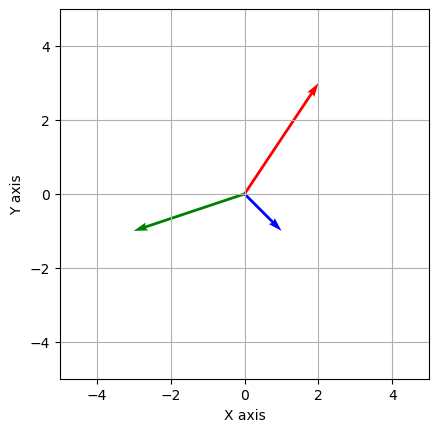

In [13]:
import matplotlib.pyplot as plt

# Create a figure and an axes.
fig, ax = plt.subplots()

# Starting point of the vectors
origin = np.array([0, 0])

# Plot a vector without using numpy arrays.
ax.quiver(0,0, -3, -1, color='g', scale=1, scale_units='xy', angles='xy')

# Plotting the vector1.  quiver draws an arrow from the origin
# Familar with the "asterisk" operator in Python?
#
# It unpacks the array causing each element in the passed array to be passed as its
# own argument.
ax.quiver(*origin, *vector1, color='r', scale=1, scale_units='xy', angles='xy')

# The line above is equivalent to
# ax.quiver(0, 0, vector1[0], vector1[1], color='r', scale=1, scale_units='xy', angles='xy')

# Plotting the vector2
ax.quiver(*origin, *vector2, color='b', scale=1, scale_units='xy', angles='xy')

# Setting the aspect of the plot to be equal, to maintain the scale of the vectors
ax.set_aspect('equal')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')

# Set limits of the graph.
plt.xlim(-5, 5)
plt.ylim(-5, 5)

# Adding grid
plt.grid(True)

# Show the plot
plt.show()

## Matrices in LaTeX

Rendering a matrix using LaTeX uses the same `bmatrix` environment but 
using `&` to separate each of the column elements.

`
$$
\begin{bmatrix}
5 & 3 \\
2 & 4
\end{bmatrix}
$$
`

appears as

$$
\begin{bmatrix}
5 & 3 \\
2 & 4
\end{bmatrix}
$$

## Matrices in Python.  

I would use numpy to represent matrices as we did for vectors, and for the
same reasons.

In [14]:
matrix = np.array([[5, 3],
                   [2, 4]])
print(matrix)

[[5 3]
 [2 4]]


In [15]:
# I can represent the matrix above as latex, but it is a bit clunky.

from IPython.display import display, Math

# Converts a numpy array to a LaTeX matrix
def numpy_to_latex_matrix(matrix):
    latex_str = r'\begin{bmatrix}'
    for row in matrix:
        latex_str += ' & '.join(map(str, row)) + r' \\'
    latex_str += r'\end{bmatrix}'
    return latex_str

def print_matrix(matrix):
    display(Math(numpy_to_latex_matrix(matrix)))

print_matrix(matrix)


<IPython.core.display.Math object>

In [16]:
# indexing an element in a numpy representation of a matrix.

In [17]:
matrix[1][0]

2

## Tensors

A tensor is a matrix with any number of dimensions.
    
A matrix is a 2 dimensional tensor.  

A vector is a 1 dimensional tensor.

A scalar is a 0 dimensional tensor.

When a tensor has three dimensions, we would represent indexing a particular element using the following:

$$
\mathbf{A}_{i,j,k}
$$



## Tensors in Machine Learning

Tensors are frequently used in machine learning.  The weights within a neural network are
often represented as a tensor.  

When applying machine learning to image processing, the inputs to the machine learning
algorithm are often images.

Color images often break the colors into separate channels.   For example
an RGB image has three color channels.   These channels can be laid out in memory
as separate planes wherein each plane corresponds to single color.  If we have a 1024x768 RGB
image, each plane is a 1024x768 matrix with 1 element for each pixel.  The three planes
together form a 3-d tensor.


A 3d tensor RGB image 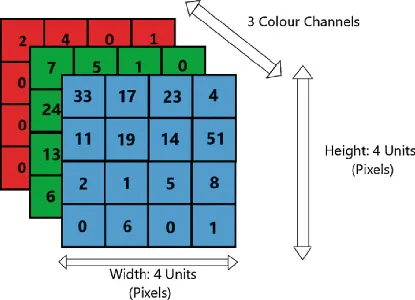

# Video as a tensor

When we apply machine learning in the context of video processing, we may think of the
video as a tensor.

A video can be considered a series of frames (i.e., images).  A sequence of color images can be
represented as a 4-d tensor.

## Operations on matrices

As with scalars and vectors, we can add or multiply matrices, but matrices add some complications.
Division is no longer straightforward, and multiplication is no longer commutative.  We also have 
additional operators that make little sense for scalars or vectors, e.g., transpose.

Numpy implements many matrix operations including transpose.

In [18]:
import numpy as np

matrix = np.array([[7, 8, 1],
                   [5, 6, -1],
                   [2, 3, 4]])
print("Original:")
print_matrix(matrix)

# Transpose the matrix using .T
transposed = matrix.T
print("Transposed using .T:")

print_matrix(transposed)

# Transpose the matrix using transpose() function
transposed2 = np.transpose(matrix)
print("Transposed using transpose():")
print_matrix(transposed2)

Original:


<IPython.core.display.Math object>

Transposed using .T:


<IPython.core.display.Math object>

Transposed using transpose():


<IPython.core.display.Math object>

In [19]:
# adding two matrices
ma = np.array([[7, 8, 1],
               [5, 6, -1],
               [2, 3, 4]])
mb = np.array([[-1, 2, 5],
               [-3, 1, 8],
               [-7, 3, 9]])

print_matrix(ma+mb)

<IPython.core.display.Math object>

In [20]:
# adding two matrices of differing size generates a ValueError.
ma = np.array([[7, 8, 1],
               [5, 6, -1],
               [2, 3, 4]])
mb = np.array([[-1, 2],
               [-3, 1],
               [-7, 3]])
# print_matrix(ma+mb)  # uncomment to get a ValueError.

In [21]:
# Note: The plus operator has a different meaning for Python lists.  It performs
# concatenation rather than matrix addition.
[1,2,3] + [4,5,6]

[1, 2, 3, 4, 5, 6]

In [22]:
[[7, 8, 1], [5, 6, -1], [2, 3, 4]] + [[-1, 2, 5], [-3, 1, 8], [-7, 3, 9]]

[[7, 8, 1], [5, 6, -1], [2, 3, 4], [-1, 2, 5], [-3, 1, 8], [-7, 3, 9]]

In [23]:
# Matrix multiplication

ma = np.array([[1, 2],
               [3, 5]])
mb = np.array([[7, 1],
               [4, 0]])
mc = ma @ mb

print_matrix(mc)

<IPython.core.display.Math object>

In [24]:
mc = mb @ ma
print_matrix(mc)

<IPython.core.display.Math object>

In [25]:
mc = (mb.T @ ma.T).T

In [26]:
print_matrix(mc)

<IPython.core.display.Math object>